### Estrutura

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [55]:
dados = pd.ExcelFile('/content/Focus_26_09_2022.xlsx')

igp_m = dados.parse(sheet_name = 'IGP-M Focus' , parse_dates = True , usecols = 'A:E' , index_col = 0 , skiprows = 2).dropna(how = 'all')
ipca = dados.parse(sheet_name = 'IPCA Focus' , parse_dates = True , usecols = 'A:E' , index_col = 0 , skiprows = 2).dropna(how = 'all')
ipca_12m = dados.parse(sheet_name = 'IPCA 12m' , parse_dates = True , usecols = 'A:C' , index_col = 0 , skiprows = 2).dropna(how = 'all')
ipca_top5 = dados.parse(sheet_name = 'IPCA Focus Top 5' , parse_dates = True , usecols = 'A:E' , index_col = 0 , skiprows = 2).dropna(how = 'all')
selic = dados.parse(sheet_name = 'Selic Focus' , parse_dates = True , usecols = 'A:E' , index_col = 0 , skiprows = 2).dropna(how = 'all')
pib = dados.parse(sheet_name = 'PIB Focus' , parse_dates = True , usecols = 'A:E' , index_col = 0 , skiprows = 2).dropna(how = 'all')
cambio = dados.parse(sheet_name = 'Câmbio' , parse_dates = True , usecols = 'A:E' , index_col = 0 , skiprows = 2).dropna(how = 'all')

In [56]:
anos = {'2022': 0,
        '2023': 1,
        '2024': 2,
        '2025': 3}

dias = {'ultimo dia': -1,
       'semana anterior':-6}


In [57]:
def grafico(dados , titulo):
  dados.plot(figsize = (22,8) , marker = 'v' , markevery = 5 , markeredgewidth = 1)

  plt.title(f'{titulo}' , fontsize = 16)
  plt.xlabel('')
  plt.ylabel('em %' , fontsize = 14)

  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)

  plt.grid(which = 'both')
  
  plt.legend( loc = 'upper left', fontsize = 14)
  # plt.text(9,6, 'Variação')
  plt.show()


def variacao_semanal(dados ,  anos , componente):
  print(f'Variação semanal (em p.p.) das expectativas de {componente}:')
  for ano in anos:
    variacao = (dados.iloc[dias['ultimo dia'] , anos[ano]] - dados.iloc[dias['semana anterior'] , anos[ano]])
    print( f'{ano}:' , variacao.round(2))
  


### IGP-M

In [58]:
variacao_semanal(igp_m , anos , 'IGP-M no final do período')

Variação semanal (em p.p.) das expectativas de IGP-M no final do período:
2022: -0.71
2023: -0.0
2024: 0
2025: -0.08


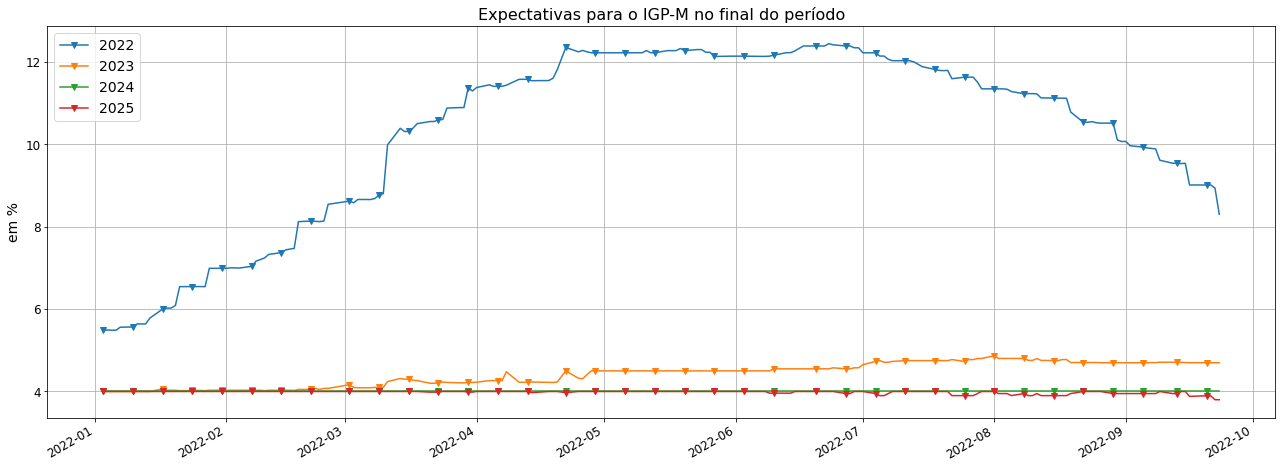

In [59]:
grafico(igp_m , 'Expectativas para o IGP-M no final do período')

### IPCA Focus

In [60]:
variacao_semanal(ipca, anos , 'IPCA no fínal do período')

Variação semanal (em p.p.) das expectativas de IPCA no fínal do período:
2022: -0.11
2023: -0.01
2024: 0.0
2025: 0.0


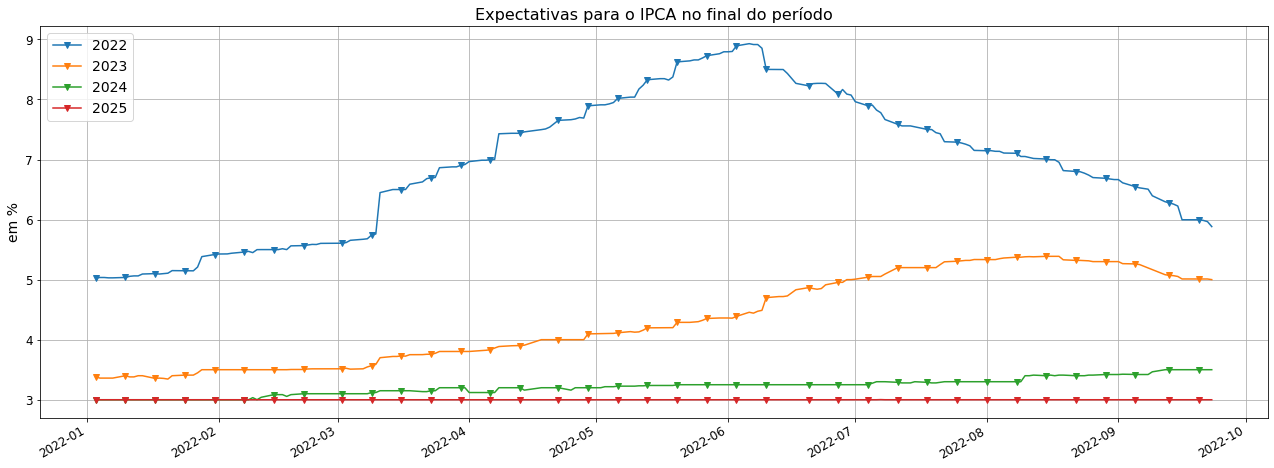

In [61]:
grafico(ipca , 'Expectativas para o IPCA no final do período')

### IPCA Focus Top 5

In [62]:
variacao_semanal(ipca_top5 , anos , 'IPCA Top 5 (médio prazo) no fínal do período')

Variação semanal (em p.p.) das expectativas de IPCA Top 5 (médio prazo) no fínal do período:
2022: -0.3
2023: 0.0
2024: 0.0
2025: 0.0


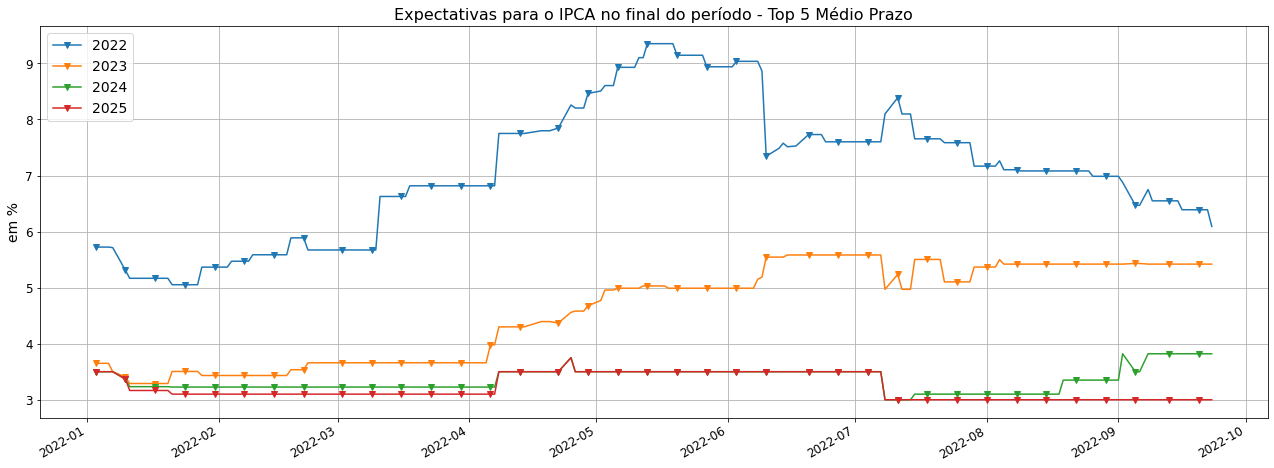

In [63]:
grafico(ipca_top5 , 'Expectativas para o IPCA no final do período - Top 5 Médio Prazo')

### IPCA 12 meses

In [64]:
for ano in anos:
    variacao1 = (ipca_12m.iloc[dias['ultimo dia'] , 0] - ipca_12m.iloc[dias['semana anterior'] , 0])
    variacao2 = (ipca_12m.iloc[dias['ultimo dia'] , 1] - ipca_12m.iloc[dias['semana anterior'] , 1])
print('Variação semanal (em p.p.) das expectativas de IPCA 12 meses:' , '\n' , f'12 meses:{variacao1.round(2)}' , '\n' , f'12 meses suavizado:{variacao2.round(2)}')

Variação semanal (em p.p.) das expectativas de IPCA 12 meses: 
 12 meses:-0.16 
 12 meses suavizado:-0.01


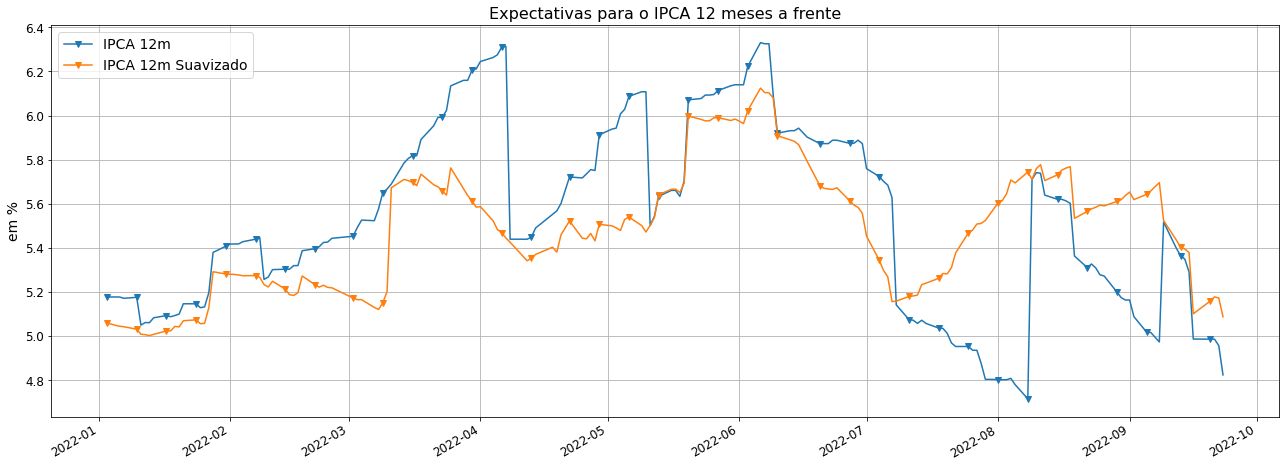

In [65]:
grafico(ipca_12m , 'Expectativas para o IPCA 12 meses a frente')

### PIB Focus

In [66]:
variacao_semanal(pib, anos , 'PIB no fínal do período')

Variação semanal (em p.p.) das expectativas de PIB no fínal do período:
2022: 0.01
2023: 0.0
2024: 0.05
2025: 0


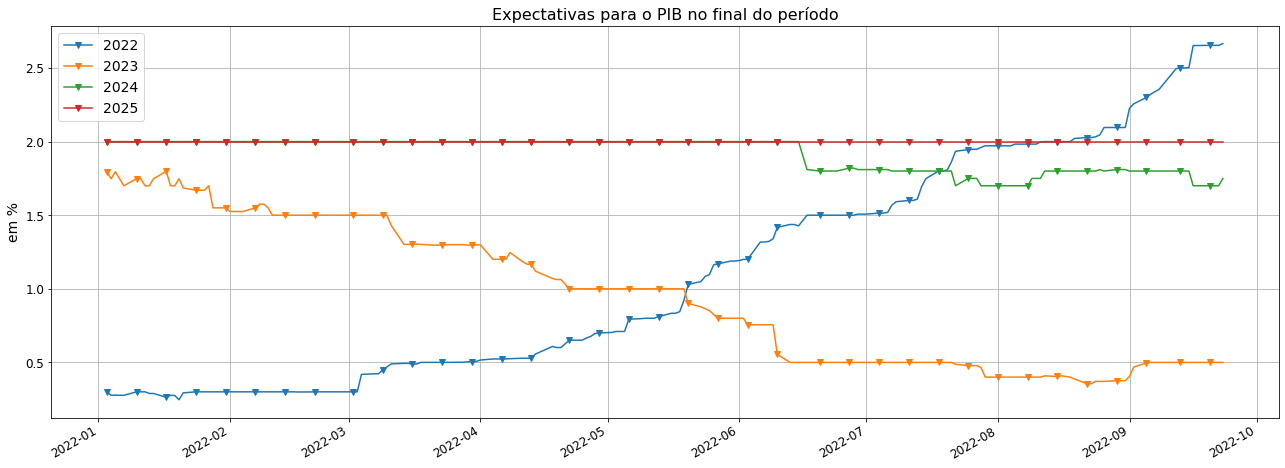

In [67]:
grafico(pib , 'Expectativas para o PIB no final do período')

### Selic

In [68]:
variacao_semanal(selic, anos , 'Taxa SELIC no final do período')

Variação semanal (em p.p.) das expectativas de Taxa SELIC no final do período:
2022: 0.0
2023: 0.0
2024: 0.0
2025: 0.12


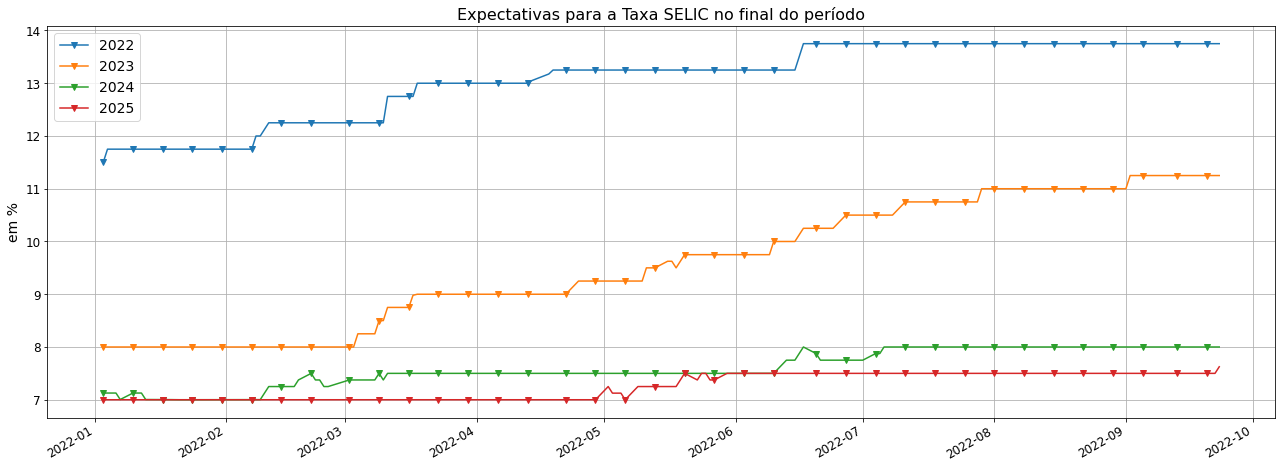

In [69]:
grafico(selic , 'Expectativas para a Taxa SELIC no final do período')

### Câmbio

In [70]:
variacao_semanal(cambio, anos , 'Taxa de câmbio no final do período')

Variação semanal (em p.p.) das expectativas de Taxa de câmbio no final do período:
2022: 0.0
2023: 0.0
2024: -0.01
2025: 0.0


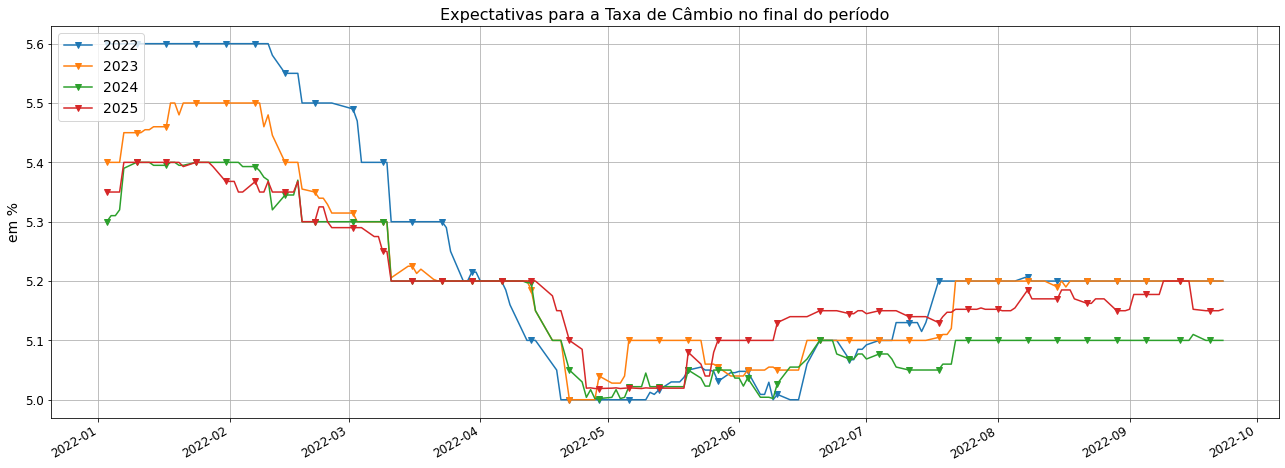

In [71]:
grafico(cambio , 'Expectativas para a Taxa de Câmbio no final do período')